### Distancia de luminosidad $D_L$

In [156]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math

#Constantes
H_0 = 70
c= 3e5

f = open("C:/Users/antoc/Downloads/PortableGit/practica2024/lcparam_full_long.txt")
#print(f.readlines())
lineas = f.readlines()

# Divide cada línea en columnas usando espacio como separador
datos_separados = [linea.strip().split(' ') for linea in lineas]

datos= []
for fila in datos_separados:
    datos.append(fila)
    #print(fila)

#print('datos:',datos)
f.close()

z_cmb_des = []
for i in range(1,len(datos)):
  a= float(datos[i][1])
  z_cmb_des.append(a)

#print('z_cmb:', z_cmb)
z_cmb_des = np.array(z_cmb_des)

m_b_des = []
for i in range(1, len(datos)):
  a= float(datos[i][4])
  m_b_des.append(a)

m_b_des = np.array(m_b_des)
#print('m_b:', m_b)

dm_b_des = []
for i in range(1, len(datos)):
    a= float(datos[i][5])
    dm_b_des.append(a)

dm_b_des = np.array(dm_b_des)
#print('dm_b:', dm_b)


In [157]:
import numpy as np

z_cmb = np.sort(z_cmb_des)

# Obtener los índices de los elementos ordenados
indices_ordenados = np.argsort(z_cmb_des)

# Mostrar el resultado
print("Array original:", z_cmb_des)
print("Arrays ordenados:", z_cmb)
print("Índices de los elementos ordenados:", indices_ordenados)

# Utilizar los índices para ordenar el array m_b_des
indices_ordenados_enteros = indices_ordenados.astype(int)
m_b = m_b_des[indices_ordenados_enteros]

# Mostrar el resultado final
print("Array original m_b:", m_b_des)
print("Array m_b ordenado según z_cmb_des:", m_b)

dm_b = dm_b_des[indices_ordenados_enteros]


Array original: [0.50309 0.4948  0.67767 ... 1.014   1.315   1.092  ]
Arrays ordenados: [0.01012 0.01038 0.01043 ... 1.8     1.914   2.26   ]
Índices de los elementos ordenados: [ 583  585  677 ... 1027 1029 1028]
Array original m_b: [22.93445 22.8802  24.0377  ... 24.85445 25.54235 24.63835]
Array m_b ordenado según z_cmb_des: [13.90745 14.0496  13.9248  ... 26.2011  26.1609  26.877  ]


In [158]:
#Relación magnitud aparente y absoluta con distancia de luminosidad
M = -19.3
D_L = np.zeros(len(m_b))
for i in range(len(m_b)):
  D_L[i]= 10**((m_b[i]-M-25)/5)
#print('D_L:', D_L)

#utilizando propagación de errores
dD = []
for i in range(len(dm_b)):
  a= (2**((m_b[i]-M-25)/5)) * (5**(((m_b[i]-M-25)/5)-1))* np.log10(10) * dm_b[i]
  dD.append(a)

Graficamos la función teórica de $D_L$ junto a los datos. Se tiene que $\Omega_s = \Omega_r + \Omega_m + \Omega_\Lambda + \Omega_k = 1$  a partir de lo que se fijan los parámetros. 

Esta función está dada por $$D_L(z) = \dfrac{c}{H_0}(1+z) \int_{0}^{z} \dfrac{1}{\sqrt{\Omega_r (1+z)^4 + \Omega_m(1+z)^3 + \Omega_l + \Omega_k(1+z)^2}} \,dz$$

Luego, tomando curvatura $\Omega_k = 0$ se tiene:

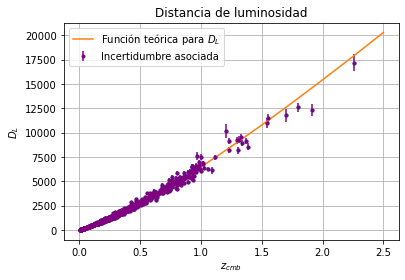

In [159]:
#Parámetros
omega_r = 8.4e-5
omega_m = 0.3
omega_l = 0.7
omega_k = 0

z_cualquiera = np.linspace(0, 2.5,100)
def regla_trapecio_numerica(x, y, j):
    integral = 0
    n = j
    for i in range(1, n):
        integral += (x[i] - x[i - 1]) * (y[i] + y[i - 1])/2
    return integral

#Función a integrar
func1 = ((omega_r * (1+z_cualquiera)**4) + omega_m * (1+z_cualquiera)**3 + omega_l + omega_k* (1+z_cualquiera)**2)**(-1/2)

# Calcular la aproximación de la integral utilizando la regla del trapecio
resultado_integral = np.zeros_like(z_cualquiera)
for j in range(len(z_cualquiera)):
    resultado_integral[j] = regla_trapecio_numerica(z_cualquiera, func1, j)
    #print("El resultado de la integral es:", resultado_integral[j])

#Ecuación
DL_t = (c/H_0)* (1+z_cualquiera)* resultado_integral

plt.plot(z_cmb, D_L, '.')
plt.plot(z_cualquiera, DL_t, label= 'Función teórica para $D_L$')

plt.xlabel('$ z_{cmb} $')
plt.ylabel('$ D_L $')
plt.errorbar(z_cmb, D_L, yerr=dD, fmt='.', color='purple', label = 'Incertidumbre asociada')

plt.title('Distancia de luminosidad')
plt.legend()
plt.grid(True)
plt.show()


Se obtienen los datos del parámetro de Hubble a partir de los datos de magnitud aparente y por lo tanto de la distancia de luminosidad encontrada.
Se utiliza la ecuación $$H(z) = c \left[ \dfrac{d}{dz} \left( \dfrac{D_L(z)}{1+z} \right) \right]^{-1}$$

In [160]:
func = D_L / (1 + z_cmb)

derivada = np.zeros_like(D_L)
for i in range(len(D_L)-1):
  if z_cmb[i+1]- z_cmb[i] ==0:
    derivada[i] = 0
  else:
    derivada[i] = (func[i+1] - func[i]) / (2 * (z_cmb[i+1]- z_cmb[i]))


H_DL = np.zeros_like(D_L)
for i in range(len(D_L)):
  if derivada[i] == 0:
    H_DL[i]=0
  else:
    H_DL[i] = c * (1/derivada[i])

#Sacándole un dato a H(z) para observar la distribución
for i in range(len(D_L)-1):
  if H_DL[i] >= 1 * (10**-9):
    H_DL[i] = 0


In [161]:
# Calcular la derivada numérica utilizando diferencias finitas centradas
derivada = np.gradient(func, z_cmb, edge_order=2)

# Calcular H_DL
H_DL = np.zeros_like(D_L)
for i in range(len(D_L)):
    if derivada[i] == 0:
        H_DL[i] = 0
    else:
        H_DL[i] = c / derivada[i]

#Sacándole un dato a H(z) para observar la distribución
for i in range(len(D_L)-1):
  if H_DL[i] >= 2000:
    H_DL[i] = 0

c:\Users\antoc\anaconda3\lib\site-packages\numpy\lib\function_base.py:1073: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\antoc\anaconda3\lib\site-packages\numpy\lib\function_base.py:1074: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\antoc\anaconda3\lib\site-packages\numpy\lib\function_base.py:1075: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\antoc\anaconda3\lib\site-packages\numpy\lib\function_base.py:1081: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


Creando la ecuación física del parámetro de Hubble para un universo con radiación, materia y constante cosmológica $\Lambda$, se tiene:
$$H(z) = H_0 \left[\Omega_r (1+z)^4 + \Omega_m(1+z)^3 + \Omega_l + \Omega_k(1+z)^2 \right]^{1/2}$$

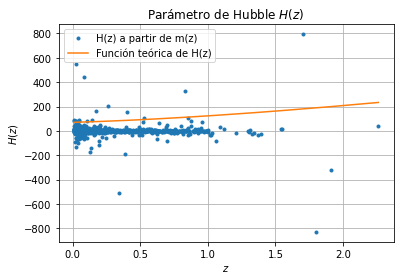

In [162]:
#Parámetros
omega_r = 8.4e-5
omega_m = 0.3
omega_l = 0.7
omega_k = 0

#Ecuación
H_t_DL = np.zeros(len(z_cmb))
H_t_DL = H_0* ((omega_r * (1+ z_cmb)**4) + omega_m * (1+z_cmb)**3 + omega_l + omega_k* (1+z_cmb)**2)**(1/2)


plt.plot(z_cmb, H_DL, '.', label= 'H(z) a partir de m(z)')
plt.plot(z_cmb, H_t_DL, label= 'Función teórica de H(z)')

plt.xlabel('$ z $')
plt.ylabel('$ H(z)$')
plt.title('Parámetro de Hubble $H(z)$')
plt.legend()
plt.grid(True)
plt.show()

In [163]:
# Ajustar modelo polinomial grado 2
model = np.poly1d(np.polyfit(z_cmb, m_b, 2))

# Crear polilínea de diagrama de dispersión
polyline = np.linspace(0, 2.5, 50)
plt.plot(z_cmb, m_b, '.')

plt.xlabel('$ z_{cmb} $')
plt.ylabel('$ m_b $')
plt.errorbar(z_cmb, m_b, yerr=dm_b, fmt='.', color='purple', label = 'Incertidumbre asociada')
#plt.plot(polyline, model(polyline), color='blue', label = 'Ajuste polinomial de orden 2')
plt.title('Magnitud aparente en función del redshift')
plt.legend()
plt.grid(True)
plt.show()

Gráfico de magnitud aparente distinto al esperado (Dark energy in practice, pág 11)

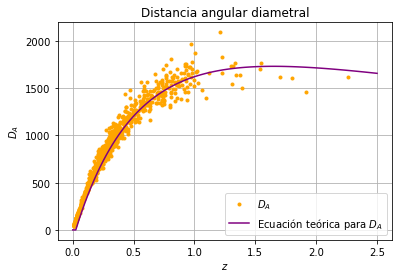

In [ ]:
d_a1 = np.zeros_like(D_L)
for i in range(len(D_L)):
    d_a1[i] = D_L[i] * (1/((1+z_cmb[i])**2))

da_t = DL_t * ((1+z_cualquiera)**(-2))


plt.plot(z_cmb, d_a1, '.', color = 'orange', label='$D_A$')
plt.plot(z_cualquiera, da_t, color = 'purple', label= 'Ecuación teórica para $D_A$')


plt.xlabel('$ z $')
plt.ylabel('$D_A$')
plt.title('Distancia angular diametral')
plt.grid(True)
plt.legend()
plt.show()

A comparar con gráfico 7.4 (Ryden, pág 139) 